# Various functions for formatting the data, and other relevant data formatting methods

Extract images from the dataset and copy it to the new folder

Used to run CSEC image correction.

In [ ]:
import os
import shutil

input_folder = "/home/dasec-notebook/Thesis/Datasets/mst-e_data/FIQA_CSEC"  # Replace with the path to your folder of folders
output_folder = "/home/dasec-notebook/Thesis/Datasets/mst-e_data/FIQA_CSEC_extracted/"  # Replace with the path to your new folder


# If no valid extensions are provided, default to common image extensions
valid_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp', '.JPG']

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Walk through the input folder and process each subfolder
for root, dirs, files in os.walk(input_folder):
    for file in files:
        if any(file.lower().endswith(ext) for ext in valid_extensions):
            # Construct the full file path
            file_path = os.path.join(root, file)
            dest_path = os.path.join(output_folder, file)
            
            counter = 1
            while os.path.exists(dest_path):
                name, ext = os.path.splitext(file)
                dest_path = os.path.join(output_folder, f"{name}_{counter}{ext}")
                counter += 1
            
            # Copy the file to the new directory
            shutil.copy(file_path, dest_path)
            print(f"Copied: {file_path} -> {dest_path}")



Recreate the folder stucture 

In [38]:
import os
import shutil

# Paths to the directories
# extracted_folder = "/home/dasec-notebook/Thesis/Datasets/CHROMA-FIT-Dataset/old/CSEC_extracted/"  # Directory with extracted files
# original_folder = "/home/dasec-notebook/Thesis/Datasets/CHROMA-FIT-Dataset/DATA_CROPPED_PORTRAIT2/"  # Original folder with folder structure
# output_folder = "/home/dasec-notebook/Thesis/Datasets/CHROMA-FIT-Dataset/CSEC/"  # New folder to add extracted files back

extracted_folder = "/home/dasec-notebook/Thesis/Datasets/mst-e_data/old/CSEC_extracted/"  # Directory with extracted files
original_folder = "/home/dasec-notebook/Thesis/Datasets/mst-e_data/mst-e_data_portrait/"  # Original folder with folder structure
output_folder = "/home/dasec-notebook/Thesis/Datasets/mst-e_data/CSEC/"  # New folder to add extracted files back


valid_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp', '.JPG']

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Walk through the original folder to replicate its structure in the output folder
for root, dirs, files in os.walk(original_folder):
    for dir_name in dirs:
        original_dir_path = os.path.join(root, dir_name)
        relative_path = os.path.relpath(original_dir_path, original_folder)
        new_dir_path = os.path.join(output_folder, relative_path)

        if not os.path.exists(new_dir_path):
            os.makedirs(new_dir_path)

# Add extracted images to their corresponding folders
for file_name in os.listdir(extracted_folder):
    if any(file_name.lower().endswith(ext) for ext in valid_extensions):
        found = False
        for root, dirs, files in os.walk(original_folder):
            if file_name in files:
                relative_path = os.path.relpath(root, original_folder)
                dest_dir = os.path.join(output_folder, relative_path)
                dest_path = os.path.join(dest_dir, file_name)

                # Copy the file to the corresponding folder
                shutil.copy(os.path.join(extracted_folder, file_name), dest_path)
                # print(f"Copied: {file_name} -> {dest_path}")
                found = True
                break

        if not found:
            print(f"Warning: {file_name} not found in original folder structure. Skipping.")


Compare 2 directories

In [ ]:
import os

def get_files_with_relative_paths(root_folder):
    """
    Walk through the folder structure and return a set of all files with their relative paths.
    """
    file_set = set()
    for root, _, files in os.walk(root_folder):
        for file in files:
            # Get the relative path of each file
            relative_path = os.path.relpath(os.path.join(root, file), root_folder)
            file_set.add(relative_path)
    return file_set

def compare_directories(root1, root2):
    """
    Compare two root directories and print out the differences.
    """
    # Get all files with relative paths for both directories
    files1 = get_files_with_relative_paths(root1)
    files2 = get_files_with_relative_paths(root2)

    only_in_root1 = files1 - files2
    only_in_root2 = files2 - files1

    # Print results
    if only_in_root1:
        print(f"Files only in {root1}:")
        for file in sorted(only_in_root1):
            print(f"  {file}")

    if only_in_root2:
        print(f"Files only in {root2}:")
        for file in sorted(only_in_root2):
            print(f"  {file}")

    if not only_in_root1 and not only_in_root2:
        print("The directories contain the same files.")

root_folder_1 = "/home/dasec-notebook/Thesis/Datasets/CHROMA-FIT-Dataset/DATA_CROPPED_PORTRAIT2" 
root_folder_2 = "/home/dasec-notebook/Thesis/Datasets/CHROMA-FIT-Dataset/CSEC" 
compare_directories(root_folder_1, root_folder_2)


# Plot covariance matrix

Baseline

In [15]:
SWATCHES_MAPPING = {
    1: [246, 237, 228],
    2: [243, 231, 219],
    3: [247, 234, 208],
    4: [234, 218, 186],
    5: [215, 189, 150],
    6: [160, 126, 86],
    7: [130, 92, 67],
    8: [96, 65, 52],
    9: [58, 49, 42],
    10: [41, 36, 32]
}



In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import os

predicted_folder = "/home/dasec-notebook/Thesis/skin_tone_estimation/baseline/results/predicted_MST"

# predicted = "/home/dasec-notebook/Thesis/skin_tone_estimation/baseline/results/predicted_MST/CHROMA-FIT.csv"
ground_truth = "/home/dasec-notebook/Thesis/skin_tone_estimation/image_paths/ground_truth_CHROMA-FIT_forehead.csv"
save_path = "/home/dasec-notebook/Thesis/visualization/confusion_matrix/computer_vision"

ground_truth = pd.read_csv(ground_truth)

# generate full paths
files = os.listdir(predicted_folder)
files = [os.path.join(predicted_folder, file) for file in files]

for predicted in files:

    save_name = os.path.basename(predicted).split(".")[0]
    print(save_name)

    predicted_data = pd.read_csv(predicted)

    merged_data = ground_truth.merge(predicted_data, left_on="ID", right_on="ID", how="inner")
    true_labels = merged_data["Ground_Truth_Avg"]
    predicted_labels = merged_data["Best_MST_Orb"]
    plt.clf()

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=range(1, 10), normalize="true")
    conf_matrix = np.round(conf_matrix, 2)  # Round to 2 decimal places

    display_labels = [str(i) for i in range(1, 10)]  # Adjust this according to your labels

    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=display_labels)
    disp.plot(cmap="Purples")
    # plt.title("Confusion Matrix: Ground Truth vs Predicted MST")
    plt.savefig(os.path.join(save_path, f"{save_name}_normalize.png"))
    plt.show()



    # Compute the confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=range(1, 10))
    conf_matrix = np.round(conf_matrix, 2)  # Round to 2 decimal places

    display_labels = [str(i) for i in range(1, 10)]  # Adjust this according to your labels

    # Display the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=display_labels)
    disp.plot(cmap="Purples")
    # plt.title("Confusion Matrix: Ground Truth vs Predicted MST")
    plt.savefig(os.path.join(save_path, f"{save_name}.png"))
    plt.show()



Extract the weighted F1 score from txt files

In [ ]:
import os
import re


# Path to the directory containing the text files
directory = "/home/dasec-notebook/Thesis/skin_tone_estimation/multiclass_classification/results/results_v2.7"

# List of files in the desired order
file_list = [
    "CHROMA_FIT_data.txt",
    "CHROMA_FIT_CSEC_data.txt",
    "CHROMA_FIT_exposure_color_correction_data.txt",
    "CHROMA_FIT_CSEC_data_original.txt",
    "CHROMA_FIT_exposure_color_correction_data_original.txt",
    "CHROMA_FIT_data_MST_original.txt",
    "CHROMA_FIT_CSEC_data_MST.txt",
    "CHROMA_FIT_exposure_color_correction_data_MST.txt",
    "CHROMA_FIT_CSEC_data_MST_original.txt",
    "CHROMA_FIT_exposure_color_correction_data_MST_original.txt"
]

# Regex pattern to match all weighted average F1-scores
weighted_f1_pattern = r"weighted avg\s+\d+\.\d+\s+\d+\.\d+\s+(\d+\.\d+)"

# Iterate through all .txt files in the directory
for filename in file_list:
    if filename.endswith(".txt"):
        file_path = os.path.join(directory, filename)
        
        with open(file_path, 'r') as file:
            content = file.read()
            
            matches = re.findall(weighted_f1_pattern, content)
            
            if matches:
                print(f"File: {filename}")
                for i, match in enumerate(matches, start=1):
                    # print(f"  Weighted Avg F1-Score {i}: {float(match)}")
                    print(float(match))
                print("-" * 50)



In [ ]:
import os
from PIL import Image
from PIL import Image, ImageOps


def crop_to_same_aspect_ratio(folder_path, output_folder, target_aspect_ratio):
    """
    Crop images to the same aspect ratio without distorting them.

    Args:
        folder_path (str): Path to the folder containing images.
        output_folder (str): Path to save the cropped images.
        target_aspect_ratio (tuple): Target aspect ratio as (width, height).
    """
    os.makedirs(output_folder, exist_ok=True)

    # Get all image file paths in the folder
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff'))]

    # Calculate the target aspect ratio
    target_width, target_height = target_aspect_ratio
    target_ratio = target_width / target_height

    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        with Image.open(image_path) as img:
            width, height = img.size
            current_ratio = width / height

            if current_ratio > target_ratio:
                # Image is wider than target aspect ratio; crop width
                new_width = int(height * target_ratio)
                left = (width - new_width) // 2
                right = left + new_width
                top = 0
                bottom = height
            else:
                # Image is taller than target aspect ratio; crop height
                new_height = int(width / target_ratio)
                top = (height - new_height) // 2
                bottom = top + new_height
                left = 0
                right = width

            # Crop the image
            cropped_img = img.crop((left, top, right, bottom))

            output_path = os.path.join(output_folder, image_file)
            cropped_img.save(output_path)
            print(f"Cropped and saved: {output_path}")

# Define folder paths
input_folder = "/home/dasec-notebook/Thesis/visualization/Cheek patches segmentation/original"
output_folder = "/home/dasec-notebook/Thesis/visualization/Cheek patches segmentation/original_cropped"

target_aspect_ratio = (13,16)

# Run the function
crop_to_same_aspect_ratio(input_folder, output_folder, target_aspect_ratio)


# CSEC bias analysis, skin tone distribution plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

MST_swatches = {
    1: '#f6ede4',
    2: '#f3e7db',
    3: '#f7ead0',
    4: '#eadaba',
    5: '#d7b496',
    6: '#a07e56',
    7: '#825c43',
    8: '#604134',
    9: '#3a312a',
    10: '#292420'
}
# Load the CSV file
data = pd.read_csv("/home/dasec-notebook/Thesis/skin_tone_estimation/baseline/results/predicted_MST/MST_CSEC.csv") 

# Count the occurrences of each MST category in Best_MST_Orb
mst_counts = data['Best_MST_Orb'].value_counts().sort_index()


bar_colors = mst_counts.index.map(MST_swatches)

# Plot the histogram
plt.figure(figsize=(10, 6))
mst_counts.plot(kind='bar', color=bar_colors, edgecolor='black')

# Customize the plot
plt.xlabel('MST Category')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.title('Distribution of Best MST Orb')

# Show the plot
plt.show()

# Plot outliers

In [ ]:
import json

json_file_path = "/home/dasec-notebook/Thesis/skin_tone_estimation/multiclass_classification/training_data/v2/CHROMA-FIT_exposure_color_correction_data.json"
indices_to_extract = [
    11,
    14,
    20,
    31,
    50,
    53,
    64,
    71,
    81,
    82,
    91,
    97,
    103,
    112,
    129,
    131,
    136,
    173,
    181,
    186,
    196,
    202,
    226,
    247,
    262,
    272,
]


def extract_all_image_names(json_file_path):
    with open(json_file_path, "r") as file:
        data = json.load(file)

    all_image_names = []

    # Iterate through all subjects
    for subject_id, subject_data in data.items():
        image_names = [key for key in subject_data if key.endswith(".JPG")]
        if image_names:
            for imahe in image_names:
                all_image_names.append(imahe)

    return all_image_names


# Extract image names from all subjects
all_images = extract_all_image_names(json_file_path)


extracted_images = [all_images[i - 1] for i in indices_to_extract]

print(extracted_images)

Plot activation functions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ReLU function
def relu(x):
    return np.maximum(0, x)

# Define the Softmax function
def softmax(x):
    e_x = np.exp(x - np.max(x))  # Stability improvement: subtract max(x) for numerical stability
    return e_x / e_x.sum()

# Generate input values
x = np.linspace(-10, 10, 100)

relu_values = relu(x)


plt.plot(x, relu_values, label='ReLU')
# plt.title("ReLU Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.grid(True, color='gray', alpha=0.35)
plt.legend()
plt.tight_layout()
plt.show()


# Generate a range of values for the input (logits)
x = np.linspace(-10, 10, 100)

# Apply the Softmax function
softmax_values = softmax(x)

# Plot the Softmax function
plt.plot(x, softmax_values, label="Softmax")
# plt.title("Softmax Activation Function")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.grid(True, color='gray', alpha=0.35)
plt.tight_layout()
plt.show()


# Plot OFIQ image examples for illumination uniformity


Interval 0.0-0.25
/home/dasec-notebook/Thesis/Datasets/CHROMA-FIT-Dataset/DATA_CROPPED_PORTRAIT2/00158/DSC_3008.JPG
/home/dasec-notebook/Thesis/Datasets/CHROMA-FIT-Dataset/DATA_CROPPED_PORTRAIT2/00155/DSC_2984.JPG
/home/dasec-notebook/Thesis/Datasets/CHROMA-FIT-Dataset/DATA_CROPPED_PORTRAIT2/00056/DSC_0926.JPG


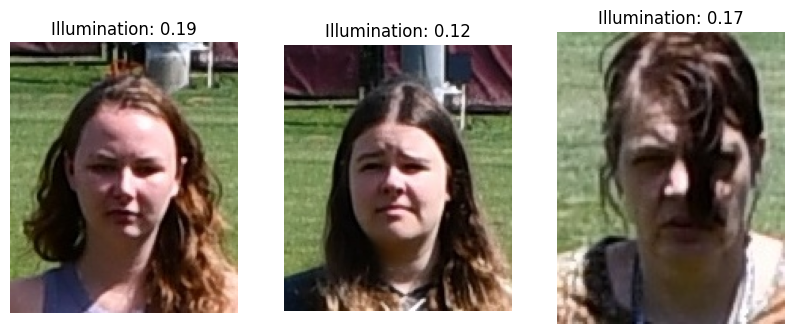

Interval 0.25-0.5
/home/dasec-notebook/Thesis/Datasets/CHROMA-FIT-Dataset/DATA_CROPPED_PORTRAIT2/00164/DSC_3199.JPG
/home/dasec-notebook/Thesis/Datasets/CHROMA-FIT-Dataset/DATA_CROPPED_PORTRAIT2/00084/DSC_1572.JPG
/home/dasec-notebook/Thesis/Datasets/CHROMA-FIT-Dataset/DATA_CROPPED_PORTRAIT2/00055/DSC_0918.JPG


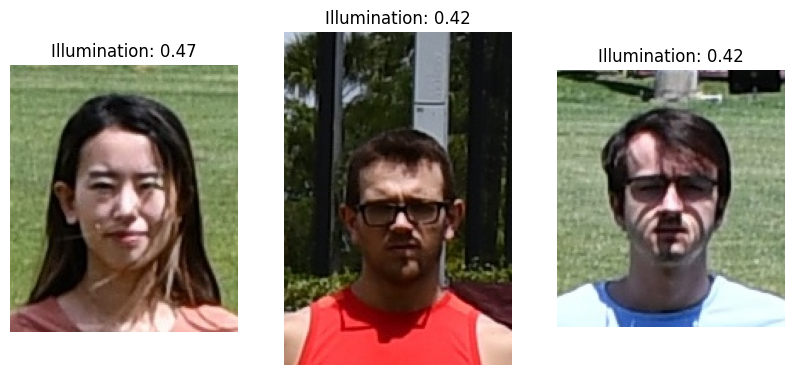

Interval 0.5-0.75
/home/dasec-notebook/Thesis/Datasets/CHROMA-FIT-Dataset/DATA_CROPPED_PORTRAIT2/00031/DSC_0259.JPG
/home/dasec-notebook/Thesis/Datasets/CHROMA-FIT-Dataset/DATA_CROPPED_PORTRAIT2/00053/DSC_0466.JPG
/home/dasec-notebook/Thesis/Datasets/CHROMA-FIT-Dataset/DATA_CROPPED_PORTRAIT2/00102/DSC_1918.JPG


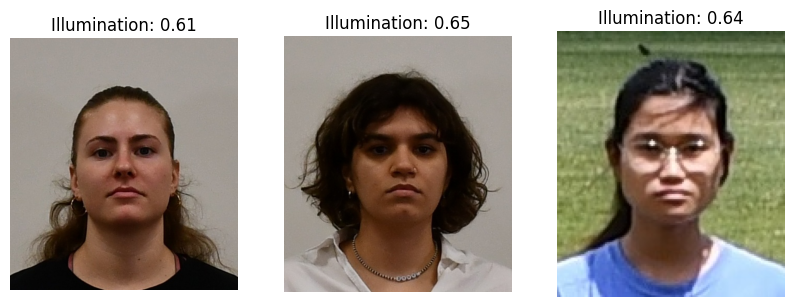

Interval 0.75-1.0
/home/dasec-notebook/Thesis/Datasets/CHROMA-FIT-Dataset/DATA_CROPPED_PORTRAIT2/00131/DSC_1155.JPG
/home/dasec-notebook/Thesis/Datasets/CHROMA-FIT-Dataset/DATA_CROPPED_PORTRAIT2/00008/DSC_0063.JPG
/home/dasec-notebook/Thesis/Datasets/CHROMA-FIT-Dataset/DATA_CROPPED_PORTRAIT2/00021/DSC_0168.JPG


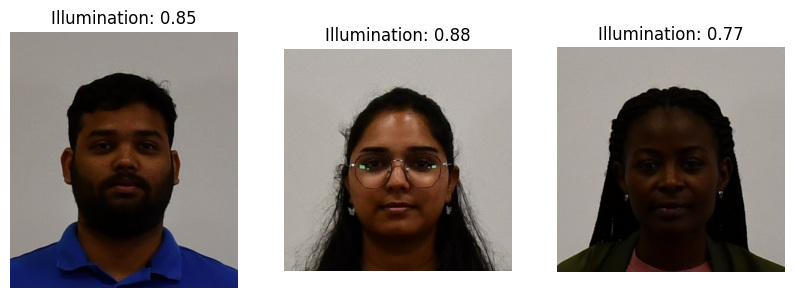

In [11]:
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

# Define paths
# image_root = "/home/dasec-notebook/Thesis/Datasets/mst-e_data/mst-e_data_portrait"
# csv_file = '/home/dasec-notebook/Thesis/skin_tone_estimation/multiclass_classification/exposure_features/OFIQ/MST.csv'

image_root = "/home/dasec-notebook/Thesis/Datasets/CHROMA-FIT-Dataset/DATA_CROPPED_PORTRAIT2"
csv_file = '/home/dasec-notebook/Thesis/skin_tone_estimation/multiclass_classification/exposure_features/OFIQ/CHROMA-FIT.csv'

# Load your data (you mentioned the data in a txt format, so we read it from a file)
df = pd.read_csv(csv_file)

# Define the intervals for illumination_uniformity
intervals = [(i / 4, (i + 1) / 4) for i in range(4)]  # [(0.0, 0.25), (0.25, 0.5), (0.5, 0.75), (0.75, 1.0)]

# Loop through each interval
for idx, (low, high) in enumerate(intervals):
    # Filter the rows based on illumination_uniformity
    filtered = df[(df['illumination_uniformity'] >= low) & (df['illumination_uniformity'] < high)]
    sample = filtered.sample(min(3, len(filtered)))  # Take up to 3 samples

    print(f"Interval {low}-{high}")
    fig, axes = plt.subplots(1, len(sample), figsize=(10, 6))

    # Add images to subplots
    for j, (_, row) in enumerate(sample.iterrows()):
        image_path = os.path.join(image_root, row['image_path'])
        print(image_path)
        # Check if the image exists
        if os.path.exists(image_path):
            img = Image.open(image_path)
            axes[j].imshow(img)
            axes[j].set_title(f"Illumination: {row['illumination_uniformity']:.2f}")
            axes[j].axis("off")
        else:
            print(f"Image not found: {image_path}")
    
    plt.show()
